In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_lasso_cat_train = df_ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

In [4]:
df_ames_lasso_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      1
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [5]:
#I am totally okay with dropping the rows with missing data
df_ames_lasso_cat_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
df_ames_lasso_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [7]:

X = df_ames_lasso_cat_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1','Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = df_ames_lasso_cat_train['SalePrice']
    

In [8]:
X.shape

(2049, 15)

In [9]:
y.shape

(2049,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
X_train.dtypes

Overall Qual        int64
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
TotRms AbvGrd       int64
Fireplaces          int64
BsmtFin SF 1      float64
Neighborhood       object
Open Porch SF       int64
Wood Deck SF        int64
Lot Area            int64
dtype: object

In [12]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [13]:
pipe3 = make_pipeline(ct1, StandardScaler(), Lasso())

In [21]:
params3 = {
           'lasso__alpha': [.005,.01, 0.1, 1, 100, 200]}
           #controls regularization

In [22]:
gs3 = GridSearchCV(pipe3, params3, n_jobs=-1)

In [23]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'lasso', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [24]:
ct1.get_feature_names_out



<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Neighborhood', 'Overall Qual'])],
                  verbose_feature_names_out=False)>

In [25]:
gs3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Neighborhood',
                                                                          'Overall '
                                                                          'Qual'])],
                                                          verbose_feature_names_out=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.005, 0.01, 0.1, 1, 100, 200]})

In [26]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075816,0.003970,0.004001,0.000633,0.005,{'lasso__alpha': 0.005},0.770184,0.889776,0.736887,0.889030,0.880815,0.833338,0.066079,2
1,0.068415,0.003383,0.003801,0.000748,0.01,{'lasso__alpha': 0.01},0.770179,0.889776,0.736887,0.889031,0.880816,0.833338,0.066080,3
2,0.071614,0.010173,0.003201,0.000400,0.1,{'lasso__alpha': 0.1},0.770094,0.889776,0.736887,0.889036,0.880827,0.833324,0.066099,5
3,0.066215,0.005531,0.004401,0.001019,1,{'lasso__alpha': 1},0.769465,0.889779,0.736890,0.889079,0.880911,0.833225,0.066239,6
4,0.017004,0.001790,0.004002,0.000896,100,{'lasso__alpha': 100},0.768045,0.890206,0.736817,0.889703,0.881865,0.833327,0.066851,4
5,0.011602,0.000800,0.003201,0.000401,200,{'lasso__alpha': 200},0.767630,0.890531,0.736725,0.890020,0.882436,0.833469,0.067151,1


In [27]:
gs3.best_params_

{'lasso__alpha': 200}

In [28]:
gs3.best_estimator_.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(),
 'lasso': Lasso(alpha=200)}

In [29]:
gs3.best_estimator_.named_steps['standardscaler'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49'], dtype=object)

In [31]:
gs3.best_score_

0.8334685184492001

In [32]:
cols_g3 = gs3.best_estimator_.named_steps.get('columntransformer').get_feature_names_out()
cols_g3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Overall Qual_2',
       'Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5',
       'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8',
       'Overall Qual_9', 'Overall Qual_10', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', '1

In [33]:
gs3.best_estimator_.named_steps['lasso'].coef_

array([ -423.80418376, -1322.91225114, -1611.81174875,   142.72058939,
        1196.44027196,  1302.21027901,  3807.04991813, -3697.0475843 ,
        -830.97375256,  -127.38716272,  3768.96771558, -1481.60650246,
        -329.04341452, -2087.77085149,   -34.41876093,     0.        ,
       -1369.51829108,     0.        ,  6076.63712544,  9608.19956065,
       -1968.7072039 , -1049.22383   ,  -742.84026707,     0.        ,
        2021.2953614 ,  8084.65968105,  1694.24777986,     0.        ,
       -1653.69190121, -2802.48655618, -3406.93966433, -2899.93406147,
          -0.        ,  4871.15213514, 13009.22042197, 21212.3957285 ,
       13035.23473763, 16738.80171789,  7907.16339431,  3405.24320493,
           0.        ,  5297.65253263,  7152.5922589 ,  2823.2961296 ,
        1290.78940107,  5747.92544771,  5710.43788898,   266.87060308,
        2175.68852018,  5009.58045146])

In [35]:
pd.DataFrame(zip(cols_g3, 
gs3.best_estimator_.named_steps['lasso'].coef_))

,0,1
0,Neighborhood_Blmngtn,-423.804184
1,Neighborhood_Blueste,-1322.912251
2,Neighborhood_BrDale,-1611.811749
3,Neighborhood_BrkSide,142.720589
4,Neighborhood_ClearCr,1196.440272
5,Neighborhood_CollgCr,1302.210279
6,Neighborhood_Crawfor,3807.049918
7,Neighborhood_Edwards,-3697.047584
8,Neighborhood_Gilbert,-830.973753
9,Neighborhood_Greens,-127.387163


In [36]:
gs3.best_estimator_.named_steps['lasso'].intercept_

183601.61002604166

In [37]:
gs3.score(X_test, y_test)

0.869114131873302

In [38]:
#Make predictions on the test set
preds = gs3.predict(X_test)

In [39]:
#Evaluate my metrics
print('Lasso Model #2 w/Categorical Vars: MAE:', mean_absolute_error(y_test, preds))
print('Lasso Model #2 w/Categorical Vars: MSE:', mean_squared_error(y_test, preds))
print('Lasso Model #2 w/Categorical Vars: R2:', r2_score(y_test, preds))

Lasso Model #2 w/Categorical Vars: MAE: 17939.195027047444
Lasso Model #2 w/Categorical Vars: MSE: 666181429.1258975
Lasso Model #2 w/Categorical Vars: R2: 0.869114131873302


This model doesn't beat the Ridge model with the categorical variables that had an Rsquared of .8723 since my Rsquared here is only .8691.  The other models were: .8561 for the Ridge model without the categorical variables versus .7186 for the Lasso model,  -.0037 for the baseline model and .5667 for the linear regression model.

In [40]:
#I want to look at some graphs of my residuals
residuals = preds - y_test

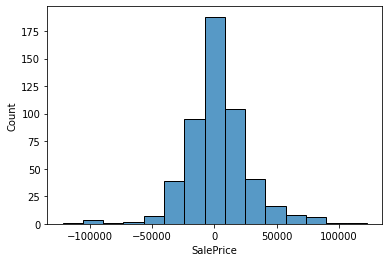

In [41]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

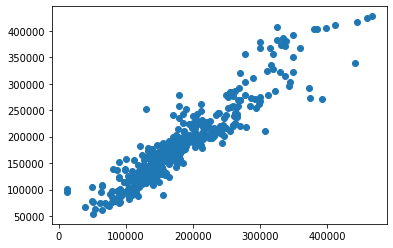

In [42]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

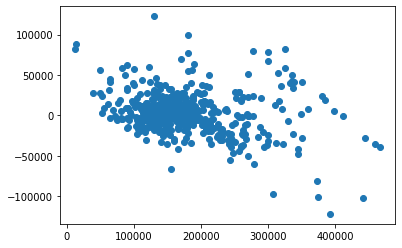

In [43]:
plt.scatter(y_test, residuals);
#That outlier at 200,000 is strange.